# Customer Segmentation and Analysis 
### Steps to approach the assignment :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Data Normalization
5. Clustering using K-Means.
6. Defining the Selected Set of Clusters.
7. Calculating the Silhouette score.
8. Translation the clusters into business insight.

## Importing Libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

## Data Exploration

In [2]:
df = pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M6W3\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

In [7]:
plt.style.use('fivethirtyeight')

### Histograms

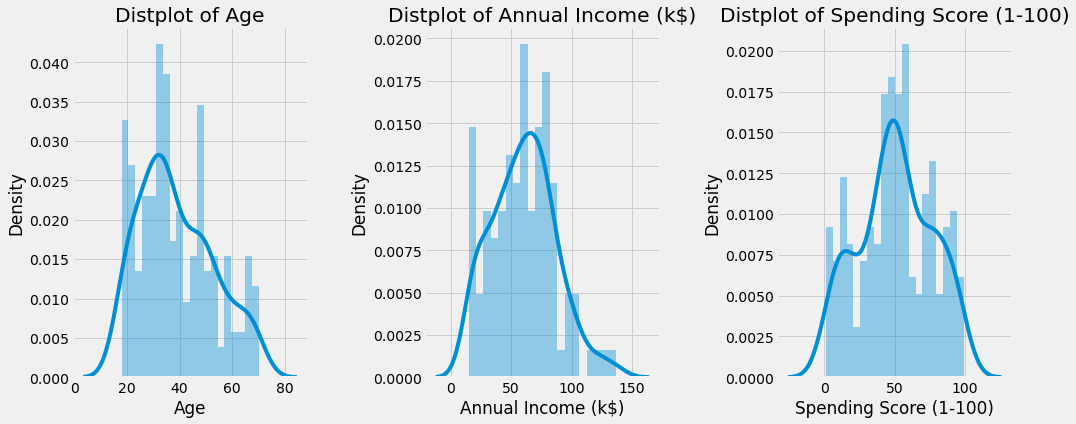

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

By looking at the above distribution plots of the Age feature, it can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern. We can alse see Descriptive Analysis that Minimum age is 18, Maximum age is 70 and 38.85 years is the average age of the population. We can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, there are equal number of visitors in the Mall for the Age 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

We can see Descriptive Analysis that Minimum Annual Income is 15k and Maximimum is 137k with an average annual income of 60.56k in USD. Further, we can see from the Annual Income histogram, it is apparent that the mode for Annual Income in the dataset population is between 70k and 80k in USD. We can also conclude from the Density Plot of Annual Income, the datapoints for this feature resemble a Normal Distribution plot. There are total 12 people who have the annual income between 54k and 78k in USD, and an insigficant proportion earns over 100,000 USD per annum.

We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and 50.2 is the average score. In the above plot we plot the count of spending score here we see that most of the spending score skweed between 40 to 60. There are total of 8 people who have spending score 42 and 7 people have 55.

### Count Plot of Gender

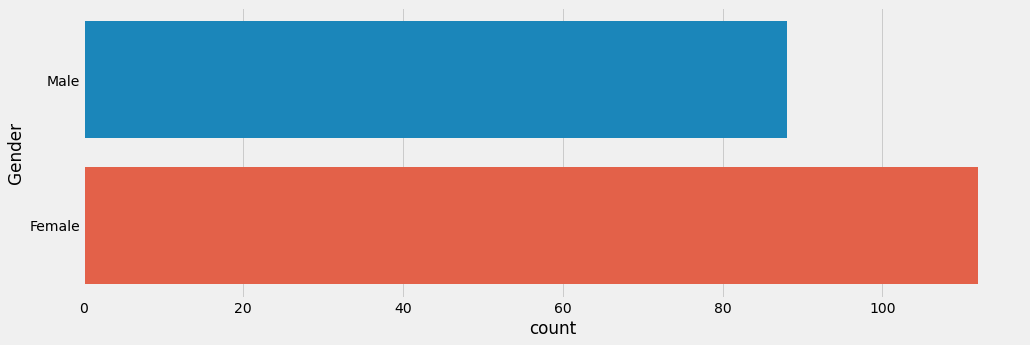

In [9]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

We can see clearly that Population of Female is more than Male. We can also observe from the Bar Chart that Female is 56% and Male is 44% in whole Population.

### Ploting the Relation between Age , Annual Income and Spending Score

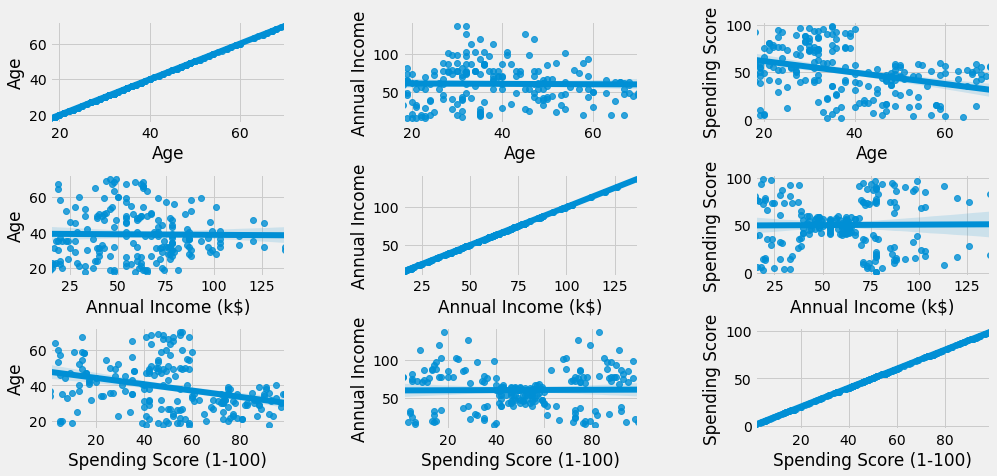

In [10]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

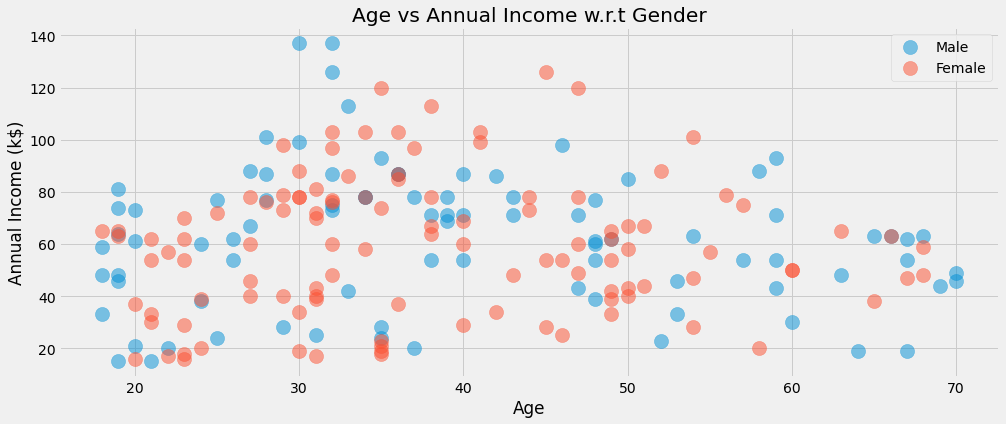

In [11]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

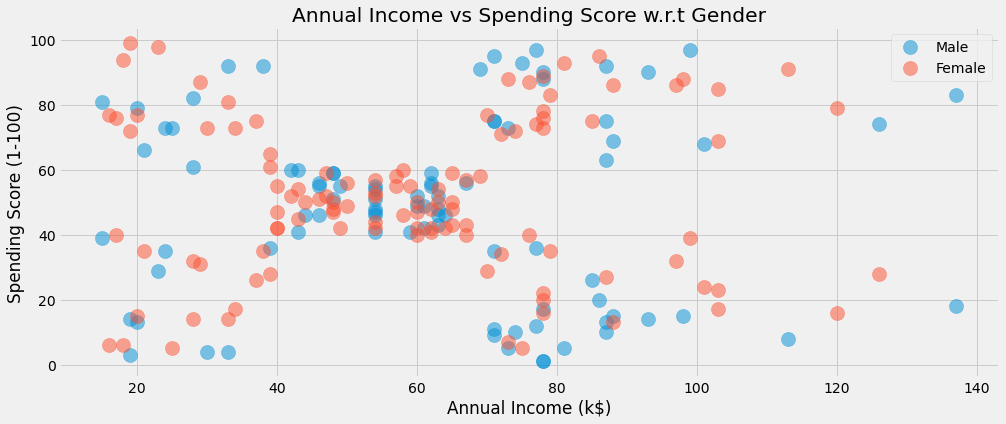

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

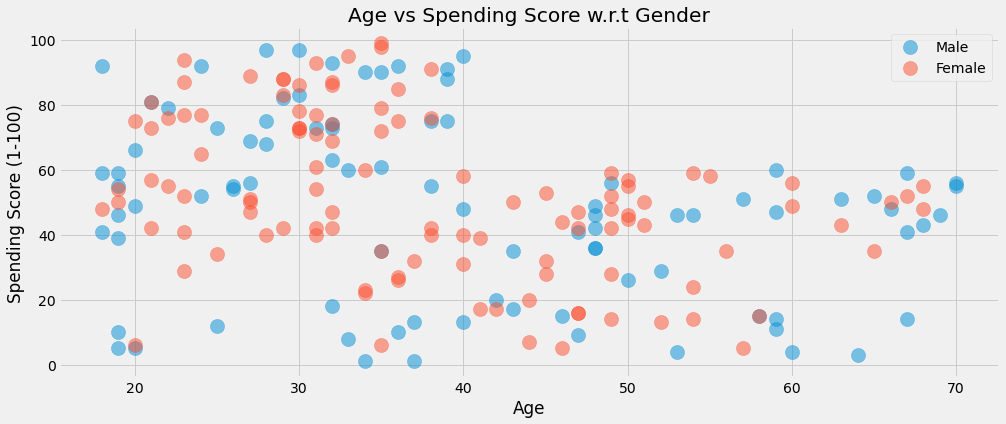

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

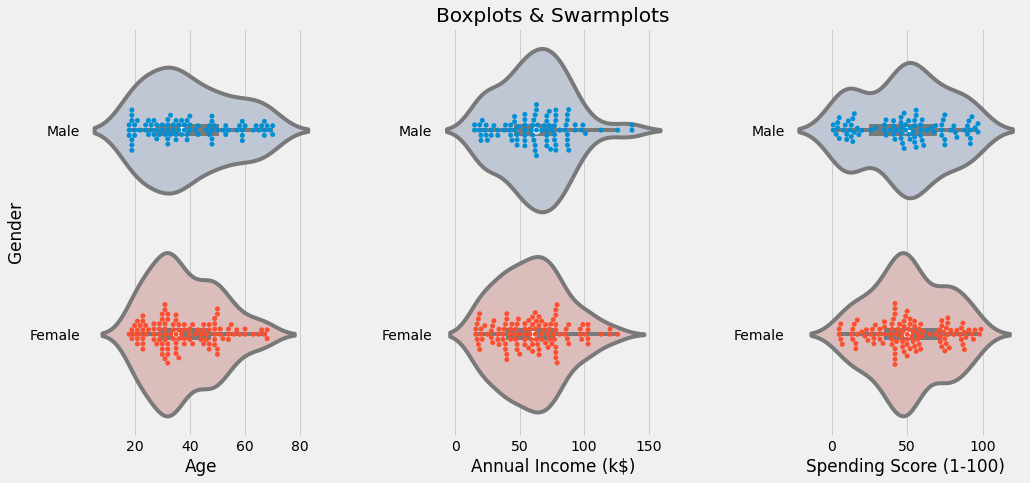

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will utilize the X parameter from now on.

In [15]:
# Set up the new X data subset which drops irrelevant features for prediction purpose
dropped_data = df.drop(['CustomerID', 'Gender'], axis=1)

## Data Normalization

In [16]:
scaled_data = StandardScaler().fit_transform(dropped_data)
scaled_df = pd.DataFrame(scaled_data, columns = dropped_data.columns)
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [17]:
'''Age and spending Score'''
X1 = scaled_df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

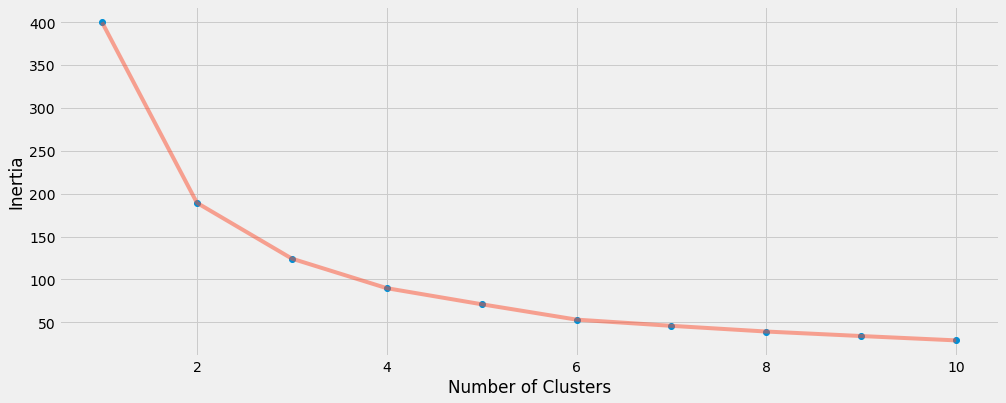

In [18]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [19]:
# From the "elbow plot" above. we want to select a point where inertia is low, and the number of clusters is not overwhelming for the business.
# Hence, we will select 6 clusters 
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [20]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

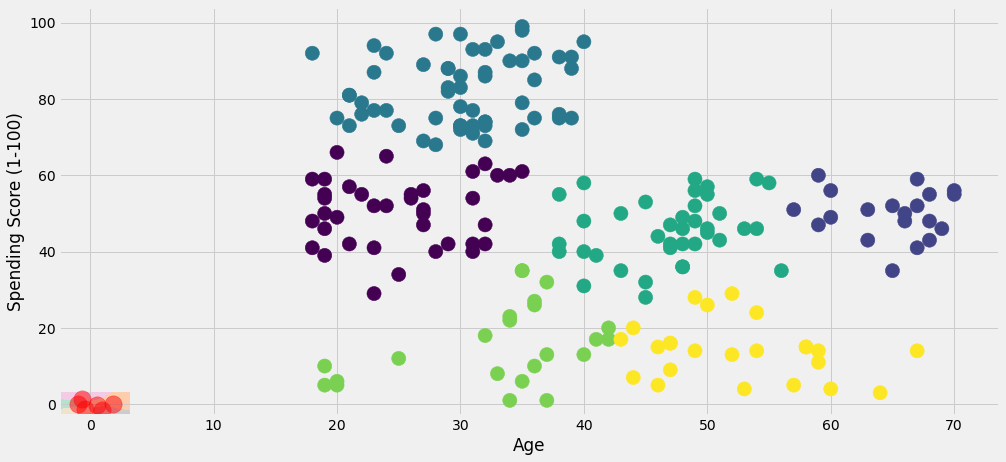

In [21]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2. Segmentation using  Annual Income and Spending Score

In [22]:
'''Annual Income and spending Score'''
X2 = scaled_df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

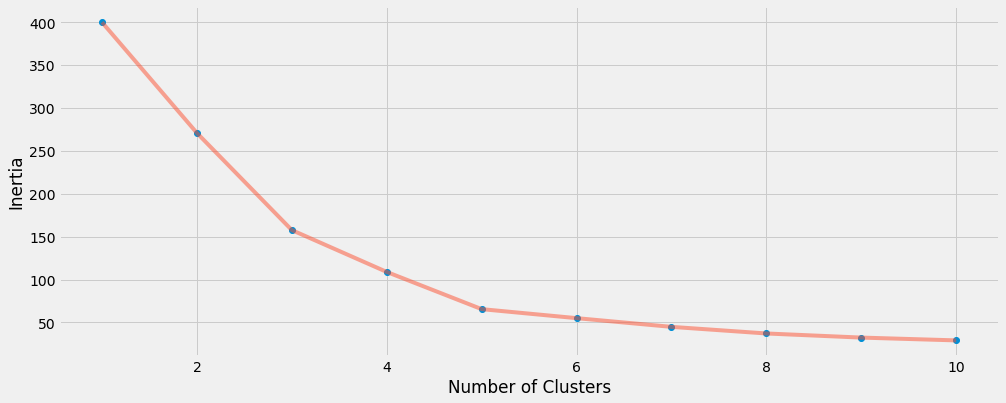

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [24]:
# From the "elbow plot" above. we want to select a point where inertia is low, and the number of clusters is not overwhelming for the business.
# Hence, in this case, we will select 5 clusters 
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [25]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

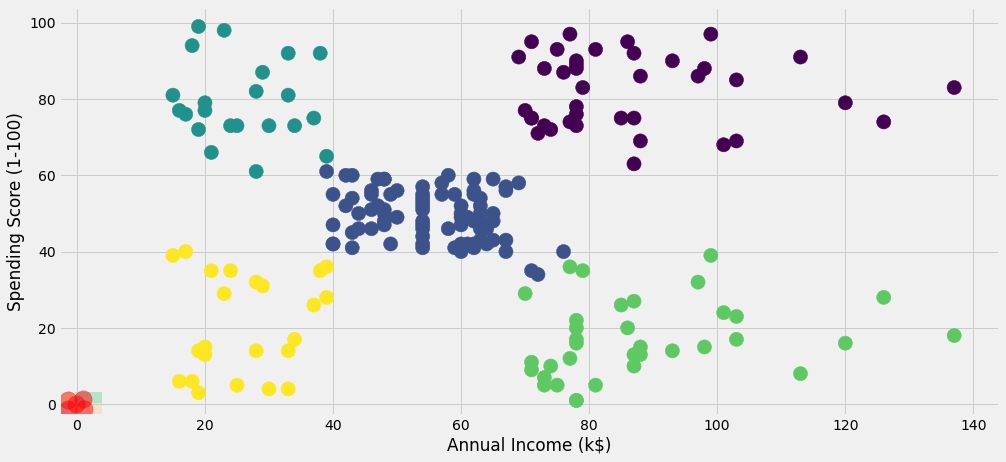

In [26]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [27]:
X3 = scaled_df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

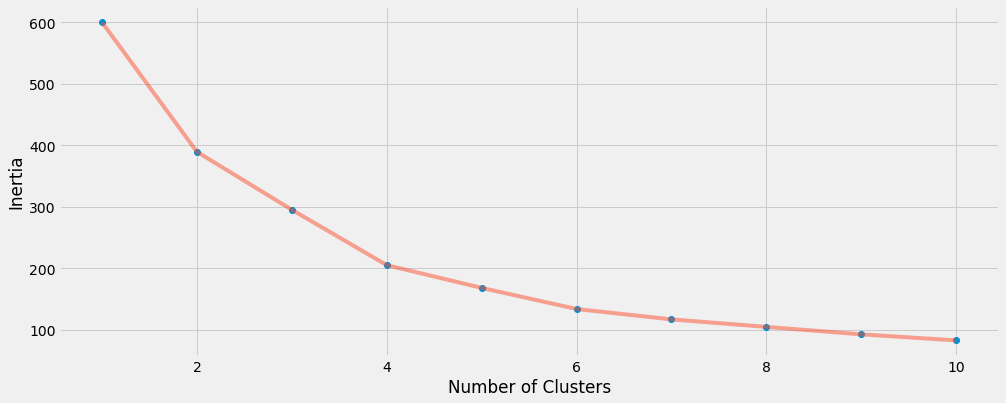

In [28]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [29]:
# From the "elbow plot" above. we want to select a point where inertia is low, and the number of clusters is not overwhelming for the business.
# Comparable to the two previous predictions based on paired features, with more features incorporated to the K-Mean model, the higher the inertia value.
# Nevertheless, I believe 6 clusters is the right number to choose in this case

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit_predict(X3)
cluster = algorithm.predict(X3)

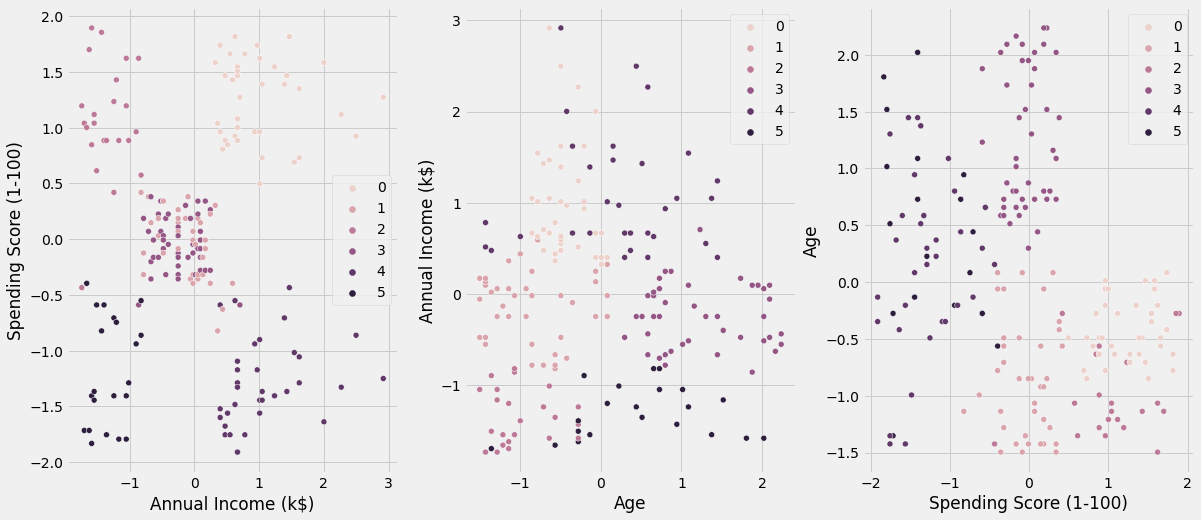

In [30]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=cluster, data=scaled_df, ax=axes[0])
sns.scatterplot(x='Age', y='Annual Income (k$)', hue=cluster, data=scaled_df, ax=axes[1])
sns.scatterplot(x='Spending Score (1-100)', y='Age', hue=cluster, data=scaled_df, ax=axes[2])

From the scatterplots above, we can observe that for the relationship between Spending Score and Annual Income, the 6 clusters are seperated distinctively; whereas for each individual relationship of the Spending Score and Annual Income feature with regards to Age, the clusters are quite intertwined with one another.

## Defining the Selected Set of Clusters

In [31]:
df1 = df.copy()
labels = pd.DataFrame(algorithm.labels_)
clustered_data = df1.assign(Cluster=labels).drop(columns='CustomerID')
clustered_data['Gender'] = clustered_data['Gender'].map({'Male':1,'Female':0})
grouped_km = clustered_data.groupby(['Cluster']).mean().round(2)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(2).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.46,32.69,86.54,82.13
1,1,0.34,27.00,56.66,49.13
2,2,0.43,25.00,25.26,77.61
3,3,0.42,56.33,54.27,49.07
4,4,0.59,41.26,88.50,16.76
5,5,0.38,45.52,26.29,19.38


Using K-Means clustering, we divided the mall customers into 6 groups:

- Young customers in their mid 20s with low annual income (averaging 25.26k) and above average spending score (77.61/100) (57% females)
- Young customers in their late 20s with medium annual income (averaging 56.66k) and medium spending score (49.13/100) (66% females)
- Customers in their early 30s with high annual income (averaging 86.54k) and considerably high spending score (82.13/100) (54% females)
- Customers in their early 40s with high annual income (averaging 88.50k) and low spending score (16.76/100) (41% females)
- Customers in their late 40s with low annual income (averaging 26.29k) and low spending score (19.38/100) (62% females)
- Customers in their late 50s with medium annual income (averaging 54.27k) and medium spending score (49.07/100) (58% females)

## Calculating the Silhouette score

For n_clusters = 6  and seed = 111 
The average silhouette_score is : 0.42685477471133887


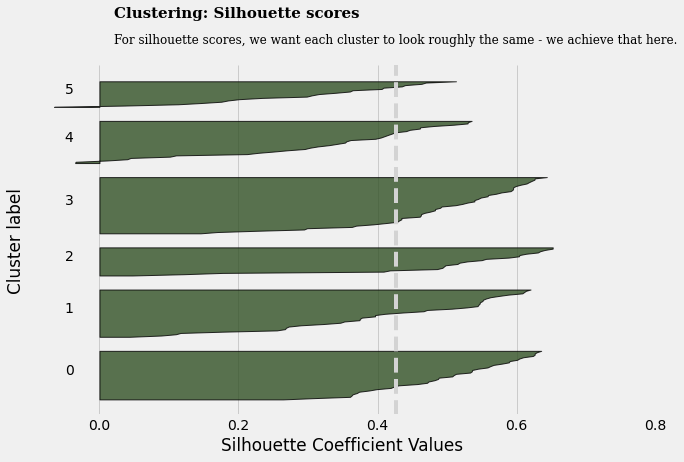

In [32]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

#Selecting columns for clusterisation with k-means
selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = df.loc[:,selected_cols]

#Scaling
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Fit and Calculate the average silhouette score
clusterer = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 6," and seed =", 111,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(6):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 6)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor='#325125', edgecolor="black",linewidth=1, alpha=0.8)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    
fig.text(0.198, .99, 'Clustering: Silhouette scores', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.198,.93, 'For silhouette scores, we want each cluster to look roughly the same - we achieve that here.', fontsize=12, fontweight='light', fontfamily='serif')
    

ax1.get_yaxis().set_ticks([])
#ax1.set_title("Silhouette plot for various clusters",loc='left')
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="lightgray", linestyle="--")
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.show()

*Silhouette score concepts:*
- Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
- Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).
- The silhouette score falls within the range [-1, 1].
- The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
- The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
- The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

## Translation the clusters into business insight

**Discussing the effectiveness of the clustering model**

From the above clusters definitions and graphs, in my opinion, the algorithm has built a model that can suggest meaningful results. The reasons are three-fold.

1) First and foremost, each cluster has its own unique characteristics albeit it is the customer's age group, annual income level or spending behaviour reflects through the score. Even the genden percentage within each cluster also ranging between 40% to 70% in spite of the quite balance gender distribution within the dataset, and that gender is not part of the consideration while building the model.

2) From the scatterplots, it is also clear that the clusters also distributed logically where cross-over sections are not overwhelmingly the norm.

3) In consideration of the silhouette scores, this built model achieve moderate score of 0.46 compared to the perfect score of 1, and from the plot, it is also clear that the defined clusters shares roughly similiar outlays of distribution which is the goal.

**Translating the clustering results into business insight**

From the following clusters definitions, I would like to give some recommendations to the mall owner so they can better target each customer segment through designing an effective marketing strategy.

1) Young customers in their mid 20s with low annual income (averaging 25.26k) and above average spending score (77.61/100) (57% females)

2) Young customers in their late 20s with medium annual income (averaging 56.66k) and medium spending score (49.13/100) (66% females)

3) Customers in their early 30s with high annual income (averaging 86.54k) and considerably high spending score (82.13/100) (54% females)

4) Customers in their early 40s with high annual income (averaging 88.50k) and low spending score (16.76/100) (41% females)

5) Customers in their late 40s with low annual income (averaging 26.29k) and low spending score (19.38/100) (62% females)

6) Customers in their late 50s with medium annual income (averaging 54.27k) and medium spending score (49.07/100) (58% females)

My advices are further clarified below:

- Firstly with high priority is they need to upscale the spending behaviour of the 4th group of customers who earns great income but the spending score is low. Also considering their early 40s age group and most of these customers are men (59%), the products groups to be advertised should be appropriate to this group.
- Secondly, they need to think of strategies to further enhance the spending score of group 2, 5 and 6 so that the score move up the ladder instead of the current level where the customers spend according to their income, the objective is to upgrades these clusters to be similar to group 1
- Thirdly, they also need to brainstorm of strategies to at least keep the spending behaviour of customer group 1 and 3.